In [5]:
from keras.datasets import reuters
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2)

In [8]:
category = np.max(y_train)+1
print(category,'카테고리')
print(len(x_train),'학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


* y_train의 카테고리 개수는 46개
* 이 중 8,982개는 학습용, 2,246개는 테스트용으로 분리
* 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 다음 학습할 수 있음
* 여기서는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 할당
  * e.g. 3의 경우 세번째로 빈도가 높은 단어라는 뜻
* 이러한 작업을 위해 **tokenizer()**같은 함수를 사용 

In [11]:
from keras.preprocessing import sequence
from keras.utils import np_utils
# maxlen = 100 단어 수를 100개로 맞추라 (입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림)
# 100에서 모자라는 경우 모자라는 부분을 모두 0으로 채움
x_train = sequence.pad_sequences(x_train, maxlen =100)
x_test = sequence.pad_sequences(x_test,maxlen=100)
# 원-핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
model = Sequential()
model.add(Embedding(1000,100)) # 데이터 전처리 과정을 통해 입력된 값을 받아 다음층이 알아들을 수 있는 형태로 변환하는 역할 Embedding('불러온 단어 총 개수','기사당 단어 수')
model.add(LSTM(100, activation='tanh')) # RNN에서 기억 값에 대한 가중치를 제어 LSTM('기사당 단어 수')
model.add(Dense(46,activation='softmax'))

In [13]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_data=(x_test,y_test),callbacks=early_stopping_callback)

print('Test Accuracy : %.4f' %(model.evaluate(x_test,y_test)[1]))



Epoch 1/20
90/90 [==============================] - 10s 34ms/step - loss: 2.5662 - accuracy: 0.3608 - val_loss: 2.1089 - val_accuracy: 0.4826
Epoch 2/20
90/90 [==============================] - 2s 24ms/step - loss: 2.0290 - accuracy: 0.4906 - val_loss: 2.1027 - val_accuracy: 0.4911
Epoch 3/20
90/90 [==============================] - 2s 24ms/step - loss: 1.8292 - accuracy: 0.5262 - val_loss: 1.7794 - val_accuracy: 0.5436
Epoch 4/20
90/90 [==============================] - 2s 24ms/step - loss: 1.7782 - accuracy: 0.5484 - val_loss: 1.7390 - val_accuracy: 0.5646
Epoch 5/20
90/90 [==============================] - 2s 24ms/step - loss: 1.6911 - accuracy: 0.5677 - val_loss: 1.6873 - val_accuracy: 0.5730
Epoch 6/20
90/90 [==============================] - 2s 24ms/step - loss: 1.5946 - accuracy: 0.5900 - val_loss: 1.6732 - val_accuracy: 0.5623
Epoch 7/20
90/90 [==============================] - 2s 24ms/step - loss: 1.5352 - accuracy: 0.6043 - val_loss: 1.6174 - val_accuracy: 0.5868
Epoch 8/20
9

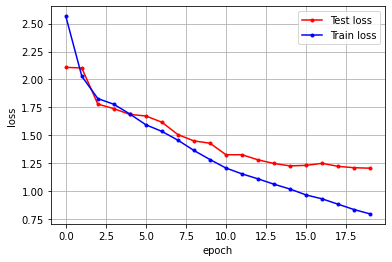

In [20]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label = 'Test loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()